#### Identificação
Caio Augusto Silva dos Reis

#### ATENÇÃO
Nos problemas 1 e 2 utilizem no mínimo três imagens diferentes.

#### Problema 1 – Clarear uma imagem escura

Uma foto noturna ficou muito escura. Como corrigi-la apenas somando um valor constante a todos
os pixels?

Passos:

- Carreguem uma imagem em tons de cinza.
- Somem 50 a todos os pixels.
- Testem com outros valores
- Verifiquem se alguns pixels passam de 255.
- Corrijam com uma operação lógica: se valor > 255, substituam por 255.

Perguntas para discussão no grupo:

- O que aconteceu quando somamos valores à imagem?

R:Nós clareamos a imagem como um todo, inclusive o que estava preto foi para 50. O que já estava branco, continuou branco.

- Por que precisamos limitar o valor máximo a 255?

R:Caso a gente não limite o valor maximo a 255, os pixels que ultrapassam esse valor podem gerar artefatos ou distorções dado que nossa biblioca de visualização não sabera como visualizar esses valores.

Resposta/observações do grupo:

R:O que está acontecendo é uma redução a escala (0,255), portanto ao reduzir para a escala correta, o maior valor 255+50 = 305 é o que vai se tornar branco.

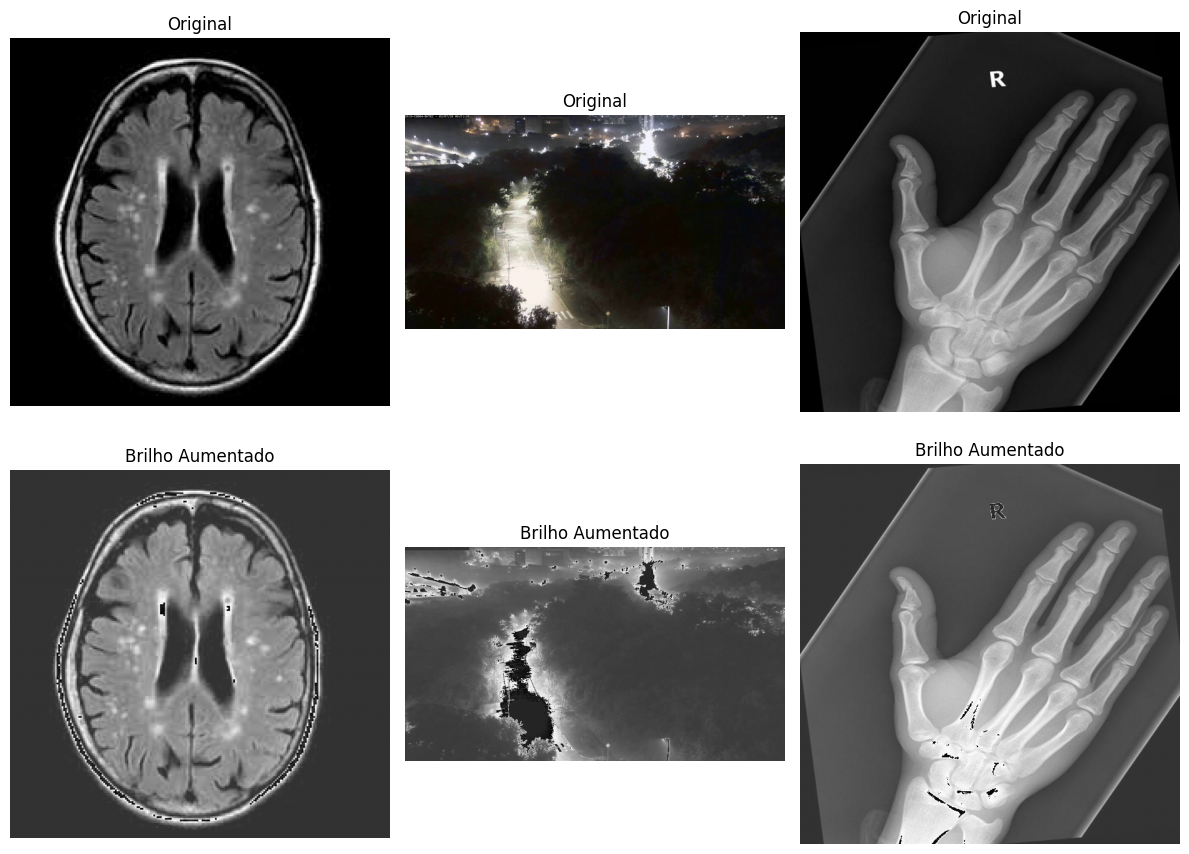

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread('../images/brain2.jpg')
img2 = cv2.imread('../images/fogo.jpg')
img3 = cv2.imread('../images/mao1.jpg')

imgs = [img1, img2, img3]
bright_imgs = []

for img in imgs:
    # se a imagem for colorida, vamos converter para cinza
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()
    bright = np.clip(gray + 50, 0, 255).astype(np.uint8)
    bright_imgs.append(bright)

# plotando as imagens originais e as imagens com brilho aumentado
# criando uma figura com 12 linhas (2 para cada imagem) e 6 colunas (2 para cada imagem)
plt.figure(figsize=(12, 9))
for i in range(len(imgs)):
    # 2 é o numero de linhas para a imagem original,
    # 3 = len(imgs) é o numero de colunas
    # 1 = i + 1 é a posicao da imagem
    # isso só é usado para o subplot, não para a figura completa
    plt.subplot(2, len(imgs), i + 1)
    # vamos converter a imagem de BGR para RGB para exibir corretamente
    plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')
    # 2 é o numero de linhas para a imagem original,
    # 3 = len(imgs) é o numero de colunas
    # 1 = i + 1 é a posicao da imagem
    plt.subplot(2, len(imgs), i + 1 + len(imgs))
    plt.imshow(bright_imgs[i], cmap='gray')
    plt.title('Brilho Aumentado')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Problema 2 – Aumentar o contraste de um documento escaneado

Um documento ficou com letras pouco visíveis. Como aumentar o contraste apenas multiplicando
os pixels?

Passos:

- Multipliquem todos os pixels por 1.5.
- Testem com outros valores
- Observem o efeito na imagem.
- Corrijam novamente para manter pixels no intervalo [0, 255].

Perguntas para discussão no grupo:

O que aconteceu com áreas claras da imagem após a multiplicação?

R: Ao realizar a multiplicação, nós estamos fazendo com que valores altos, fiquem ainda mais altos. Mas valores baixos (partes escuras da imagem) se mantém relativamente escuras se comparadas com o restante. 

Essa técnica melhorou a leitura do documento?

R: Em uma imagem de um documento com letras, tende a haver uma melhora na leitura. Dado que possiveis interferencias, cinzas, manchas claras, vão se aproximar do branco. E as cores da fonte caso sejam pretas (0,0,0) vão se manter iguais.

Resposta/observações do grupo:

R: Em darkmode (texto em branco) também funcionaria, dado que o fundo escuro ainda se manteria escuro, e as letras se aproximariam do branco.

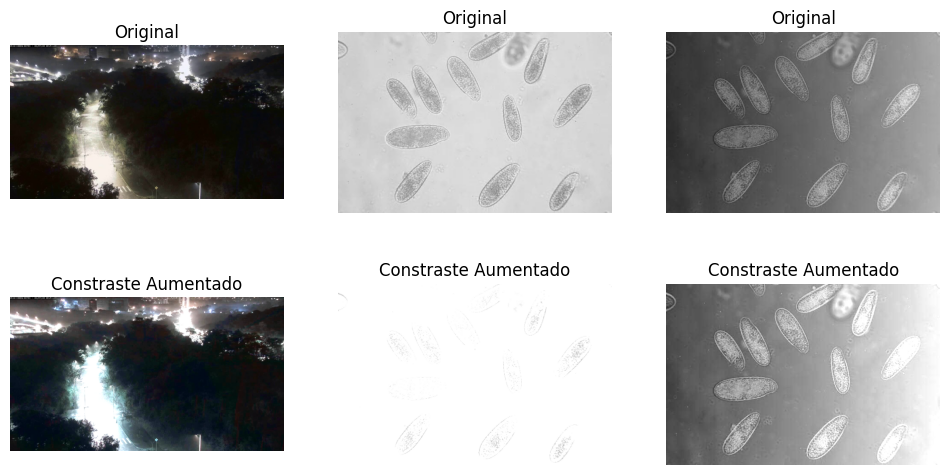

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread('../images/fogo.jpg')
img2 = cv2.imread('../images/paramecio.jpg')
img3 = cv2.imread('../images/paramecio1.jpg')

imgs = [img1, img2, img3]

plt.figure(figsize=(12, 6))

for i, img in enumerate(imgs):
    # vamos multiplicar todos os pixels por 1.5
    mult = np.clip(img * 1.5, 0, 255).astype(np.uint8)
    # plotando as imagens originais e as imagens com brilho aumentado
    # a figura ja foi criada
    plt.subplot(2, len(imgs), i + 1)
    # vamos converter a imagem de BGR para RGB para exibir corretamente
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')
    # 2 é o numero de linhas para a imagem original,
    # 3 = len(imgs) é o numero de colunas
    # 4 = i + 1 é a posicao da imagem
    plt.subplot(2, len(imgs), i + 1 + len(imgs))
    plt.imshow(mult, cmap='gray')
    plt.title('Constraste Aumentado')
    plt.axis('off')
    

#### Problema 3 – Comparar duas imagens para detectar alterações

Um sistema de vigilância capturou duas imagens do mesmo local em momentos diferentes. Como
identificar se houve mudanças apenas com operações aritméticas e lógicas?
Passos:

- Carreguem duas imagens do mesmo tamanho.
- Calculem a diferença absoluta entre elas: diff = abs(img1 - img2).
- Verifiquem onde há diferenças (diff > 0).

Perguntas para discussão no grupo:

- Que tipo de alteração foi detectada?
- Existem regiões que mudaram por causa de ruído ou variações de iluminação?
Resposta/observações do grupo:

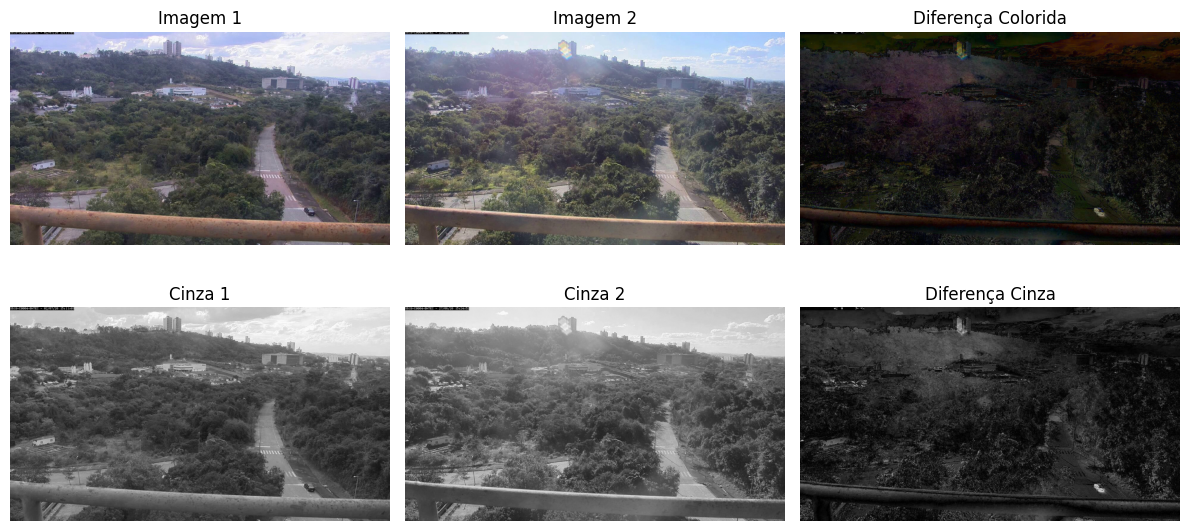

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread('../images/estrada1.jpg')
img2 = cv2.imread('../images/estrada2.jpg')

imgs = [img1, img2]
grey_imgs = []

plt.figure(figsize=(12, 6))

# vamos calcular a diferença entre elas diff = abs(img1 - img2)
diff = cv2.absdiff(img1, img2)

#vamos plotar a imagem 1, a imagem 2 e a diferença
for i in range(len(imgs)):
    # plotando as imagens originais
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Imagem {i+1}')
    plt.axis('off')
    # aproveitando o loop para converter as imagens para cinza
    grey = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2GRAY)
    grey_imgs.append(grey)
    # plotando as imagens cinzas
    plt.subplot(2, 3, i + 1 + 3)
    plt.imshow(grey, cmap='gray')
    plt.title(f'Cinza {i+1}')
    plt.axis('off')

# calculando a diferença das imagens cinzas
grey_diff = cv2.absdiff(grey_imgs[0], grey_imgs[1])

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
plt.title('Diferença Colorida')
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(grey_diff, cmap='gray')
plt.title('Diferença Cinza')
plt.axis('off')

plt.tight_layout()
plt.show()


#### Reflexão Final
##### O que aprendemos sobre o uso de operações aritméticas em imagens?

R: Somar valores clareia a imagem, multiplicar aumenta o contraste. É necessário limitar os valores a 255 para evitar distorções.

##### O que aprendemos sobre o uso de operações lógicas em imagens?

R: Permitem identificar regiões de interesse, como diferenças entre imagens (útil para vigilância ou detecção de mudanças).

##### Em que outras situações reais essas técnicas podem ser aplicadas?

R: As técnicas são úteis em processamento de documentos, realce de imagens médicas, monitoramento, e análise de mudanças.

##### Anotações finais do grupo:

R: As operações aritmeticas e logicas estão presentes em diferentes etapas do processamento digital de imagens, mesmo que não de maneira evidente. Seja na filtragem e realce, restauração, segmentação, representação e descrição, ou reconhecimento. 